In [2]:
import matplotlib.pyplot as plt

In [97]:
pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Parametric Distributions

In Section [Sound Level Distribution](../stats_random_variables.ipynb) we looked at the empirical distribution of the sound levels dataset through the lens of the histogram. Often (but not always) the distribution's shape can be described by a function with a few parameters, and those parameters can have an interpretable meaning. 

## Normal Distribution

A popular example is the Normal (Gaussian) distribution, which is characterized by the bell curve and its mean and variance. In the context of ocean acoustics, it is often assumed that ambient noise (in the absence of distinct strong noise sources) follows normal distribution, There are many other scenarios in which it is observed, in many cases explained by the Central Limit Theorem (see Section [Limit Theorems]()).

In [8]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq' -O background.wav

--2025-01-06 03:09:52--  https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq
Resolving docs.google.com (docs.google.com)... 142.251.33.78, 2607:f8b0:400a:806::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download [following]
--2025-01-06 03:09:52--  https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.33.97, 2607:f8b0:400a:80a::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.33.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5759054 (5.5M) [audio/wav]
Saving to: ‘background.wav’

background.wav      100%[===================>]   5.49M  --.-KB/s    in 0.1s    

2025-0

In [14]:
from scipy.io import wavfile

In [15]:
# reading background data
bg_samplerate, bg_signal = wavfile.read('background.wav')

We will compute the sound level per second:

In [117]:
import numpy as np
# first we split small intervals of 0.1s
bg_signal_split = np.split(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)], len(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)])/bg_samplerate*10)

In [119]:
# we calculate RMS for each interval
RMS_split = [np.sqrt(np.mean(np.square(group.astype('float')))) for group in bg_signal_split]

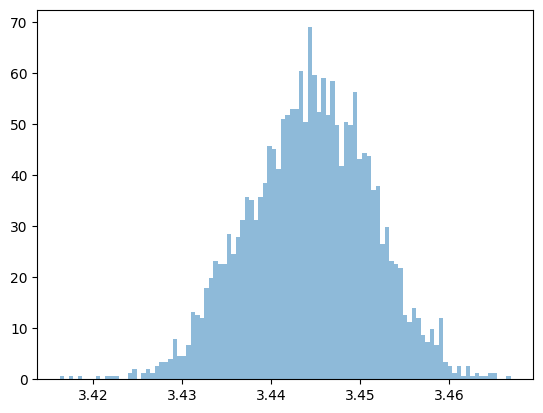

In [172]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)

We observe that the histogram is not a "perfect" bell curve, partially because there are some sounds of waves. Regardless, let's try to see how closely we can describe it with a normal distribution. 


First, we will calculate the mean and the variance of the observations, and we will overlay the normal density curve with those parameters on the histogram.

In [133]:
mean = np.mean(np.log10(RMS_split))
std = np.std(np.log10(RMS_split))

In [158]:
import scipy.stats as stats
gaussian_density = stats.norm.pdf(h[1], loc=mean, scale=std)

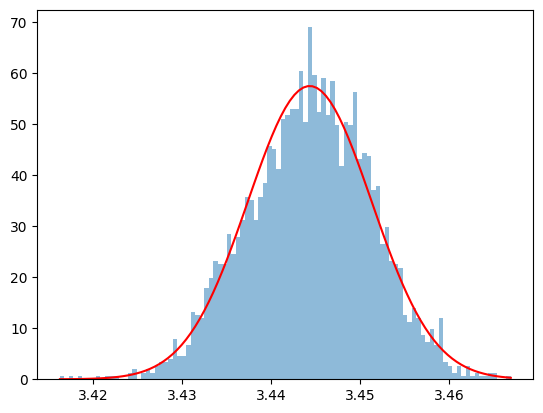

In [171]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')

## Bell Shaped Distributions

The normal distribution is not the only distribution that has a "bell shape". 

### Cauchy Distribution

In [162]:
cauchy_density = stats.cauchy.pdf(h[1],np.median(np.log10(RMS_split)), stats.iqr(np.log10(RMS_split)/2))

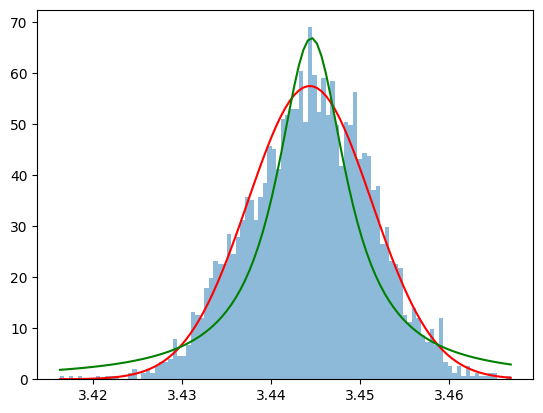

In [170]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')


### Logistic Distribution

In [166]:
import math
logistic_density = stats.logistic.pdf(h[1],mean, std/math.pi*math.sqrt(3))

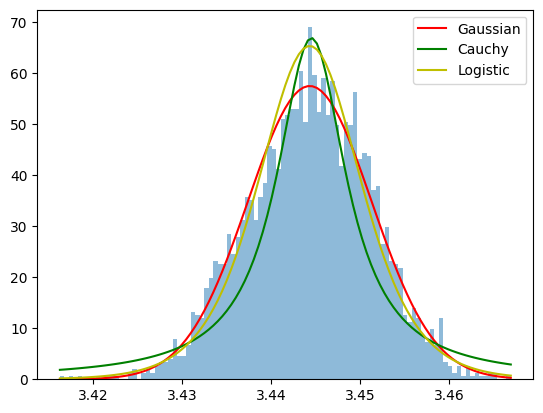

In [169]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')
plt.plot(h[1], logistic_density, 'y')
plt.legend(["Gaussian", "Cauchy", "Logistic"])

### Laplace Distribution

In [180]:
laplace_density = stats.laplace.pdf(h[1], loc=mean, scale=std)

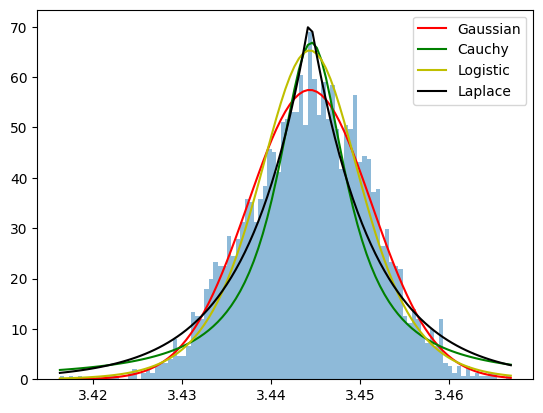

In [181]:
# visualize the histogram of the log values
h = plt.hist(np.log10(RMS_split),bins=100, density=True, alpha=0.5)
plt.plot(h[1], gaussian_density, 'r')
plt.plot(h[1], cauchy_density, 'g')
plt.plot(h[1], logistic_density, 'y')
plt.plot(h[1], laplace_density, 'k')
plt.legend(["Gaussian", "Cauchy", "Logistic", "Laplace"])

### Beta Distribution



We can see that all these distributions fit the data to some extend, but have varying sharpness of the peak and varying thickness of the tails. In the future sections we will discuss in more detail how to evaluate the fit, and find the best parameters automatically.

# Extra

## OOI dataset example

In [98]:
import obspy
st = obspy.read("/path/to/test.mseed")

In [106]:
len(st[0].data)/40

298.675

In [113]:
bg_signal = st[0].data
bg_samplerate = 40
bg_signal_split = np.split(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)], len(bg_signal[:(len(bg_signal)-len(bg_signal)%bg_samplerate)])/bg_samplerate*10)

In [114]:
RMS_split = [np.sqrt(np.mean(np.square(group.astype('float')))) for group in bg_signal_split]

(array([  1.,   1.,   1.,   0.,   1.,   2.,   1.,   2.,   3.,   5.,   6.,
         10.,  18.,  14.,  30.,  37.,  57.,  69.,  77.,  79., 101., 100.,
        112., 137., 139., 158., 171., 180., 169., 167., 163., 139., 160.,
        132., 122.,  97.,  80.,  67.,  36.,  39.,  24.,  25.,  23.,   6.,
          5.,   5.,   3.,   3.,   2.,   1.]),
 array([3.41630791, 3.41731986, 3.41833182, 3.41934377, 3.42035573,
        3.42136768, 3.42237963, 3.42339159, 3.42440354, 3.4254155 ,
        3.42642745, 3.42743941, 3.42845136, 3.42946332, 3.43047527,
        3.43148723, 3.43249918, 3.43351114, 3.43452309, 3.43553505,
        3.436547  , 3.43755895, 3.43857091, 3.43958286, 3.44059482,
        3.44160677, 3.44261873, 3.44363068, 3.44464264, 3.44565459,
        3.44666655, 3.4476785 , 3.44869046, 3.44970241, 3.45071437,
        3.45172632, 3.45273827, 3.45375023, 3.45476218, 3.45577414,
        3.45678609, 3.45779805, 3.45881   , 3.45982196, 3.46083391,
        3.46184587, 3.46285782, 3.46386978, 3.

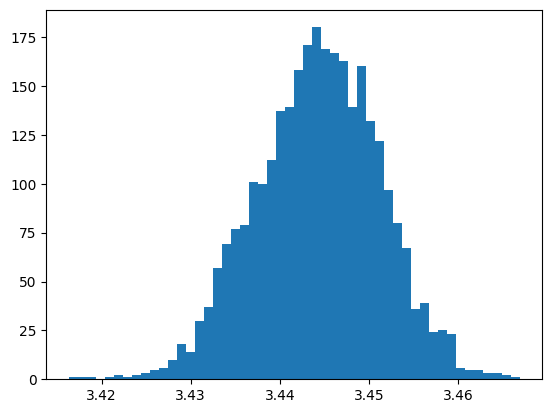

In [115]:
plt.hist(np.log10(RMS_split), bins=50)

59.0